# *Aufgabe: Baummethoden*

0. Imports

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import trange
from sklearn.datasets import load_diabetes
import numpy as np

### Aufgabe 1. Baummethoden

Implementieren Sie ein Decision Tree Modell für Klassifikationsaufgaben aus [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) und sagen Sie damit den Gehalt von Menschen auf Grundlage ihrer sozioökonomischen Attribute vorher. Nutzen Sie dafür den bereitgestellten Census Datensatz. Achten Sie darauf, dass der Datensatz vorverarbeitet werden muss, da es zahlreiche kategorische Features und fehlende Werte gibt. 

Messen Sie die Leistungsfähigkeit Ihres Modells in Abhängigkeit von der maximalen Tiefe mit einer passenden Metrik.


#### Data Preprocessing

In [2]:
# Vorbereitung wie aus dem letzten Notebook
census = pd.read_csv("../../../data/census.csv")
census = census.drop(['occupation', 'relationship', 'capital-gain', 'capital-loss', 'native-country'], axis=1)

#
imp_most_frequent = SimpleImputer(missing_values=' ?', strategy='most_frequent')
census["workclass"] = imp_most_frequent.fit_transform(
    census["workclass"].to_numpy().reshape(-1, 1)
).reshape(census.shape[0])

# Encoding:
# SEX: Male: 1, Female: 0
census["sex"] = census["sex"].replace({' Male': 1, ' Female': 0})

# TARGET: >50K: 1, <=50K: 0
census["target"] = census["target"].replace({' >50K': 1, ' <=50K': 0})

to_encode = ['workclass', 'education', 'marital-status', 'race']
for feature in to_encode:
    one_hot = pd.get_dummies(census[feature], drop_first=True)
    census = census.join(one_hot)
    census.pop(feature)

/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_1822/3062591698.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  census["sex"] = census["sex"].replace({' Male': 1, ' Female': 0})
/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_1822/3062591698.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  census["target"] = census["target"].replace({' >50K': 1, ' <=50K': 0})


In [ ]:
# Trennen in Train/Test
x_train, x_test, y_train, y_test = train_test_split(census.drop(["target"],axis=1),census["target"])
print('X Train: {}'.format(x_train.shape))
print('Y Train: {}'.format(y_train.shape))
print('X Test: {}'.format(x_test.shape))
print('Y Test: {}'.format(y_test.shape))

# Normalize: Age und hours-per-week
scaled_columns = ["age", "hours-per-week"]

minmax = MinMaxScaler()
x_train[scaled_columns] = minmax.fit_transform(x_train[scaled_columns])
x_test[scaled_columns] = minmax.transform(x_test[scaled_columns])

X Train: (24420, 35)
Y Train: (24420,)
X Test: (8141, 35)
Y Test: (8141,)


#### Trainieren der Bäume für verschiedene Tiefen

 30%|███       | 6/20 [00:00<00:00, 56.98it/s]

100%|██████████| 20/20 [00:00<00:00, 30.43it/s]


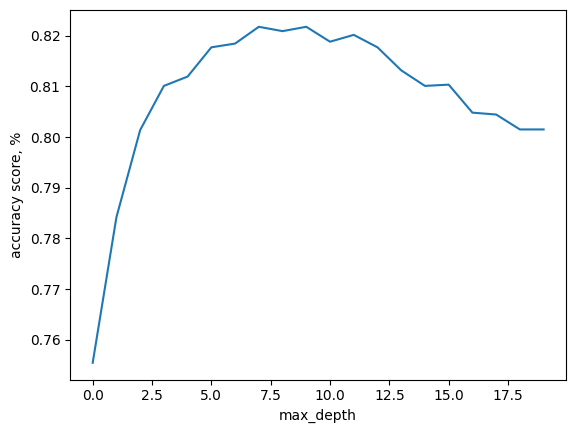

In [ ]:
error = []

# Gehe durch die möglichen Tiefen von 1 bis 20
# trange zeigt den prozentualen Fortschritt an
for i in trange(1, 21):

    # Erstelle und trainiere das Modell, aber ändere jeweils nur die Tiefe
    clf = DecisionTreeClassifier(max_depth=i, min_samples_split=5, random_state=1)
    clf.fit(x_train, y_train)

    # Speichern der Accuracy
    error.append(accuracy_score(clf.predict(x_test), y_test))

# Darstellung der Accuracy über den verschiedenen Tiefen der Bäume
plt.plot(error)
plt.xlabel('max_depth')
plt.ylabel('accuracy score, %')
plt.show()

### Aufgabe 2. Visualisierung von Baummethoden Regressor

Trainieren Sie einen Decision Tree Regressor (DTR) auf den [Diabetes Datensatz](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) aus sklearn. Dieser Datensatz gibt Risikofaktoren für Diabetes (Alter, BMI, ..) und einen Risikoscore für Diabetes. Regressieren Sie mittels eines DTR den Risikoscore. Zeigen Sie dann für das Attribut BMI auf, wie ein DTR diesen Wert nutzt, um auf den Risikoscore zu regressieren. Trainieren Sie dabei DTRs mit verschiedener Tiefe (max_depth=). Bauen Sie grafisch die folgende Darstellung nach:

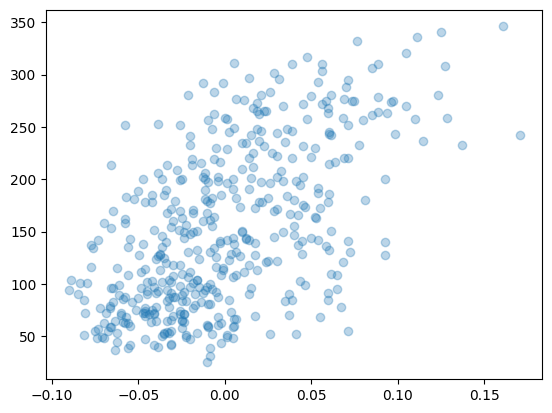

In [ ]:
# Einlesen der Daten
features, target = load_diabetes(return_X_y=True, as_frame=True)
bmi = features['bmi'].to_numpy().reshape(-1,1)
risk = target.to_numpy()
plt.scatter(bmi, risk, alpha=0.3)

Trainieren der Modelle und Visualisierung:

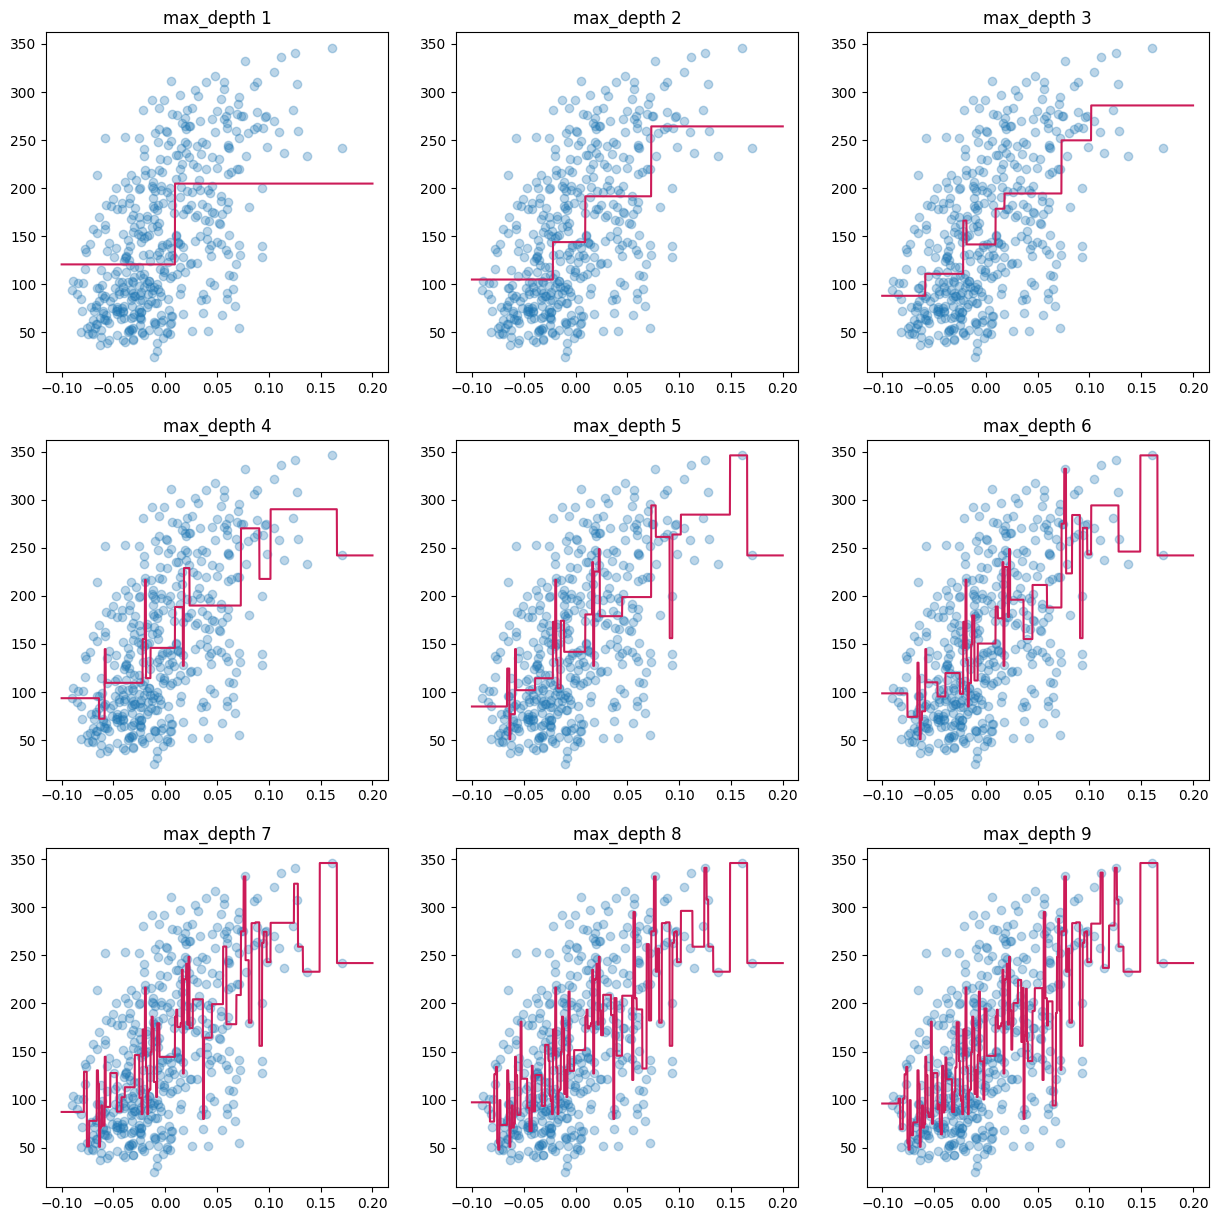

In [ ]:
fig = plt.figure(figsize=(15,15))
x_axis = np.linspace(-0.1, 0.2, 1500).reshape(-1,1)

for i in range(1, 10):

    # Darstellung von BMI und Risiko
    ax = fig.add_subplot(3, 3, i)
    ax.set_title("max_depth {}".format(i))
    ax.scatter(bmi, risk, alpha=0.3)

    # Trainieren des Regressors für verschiedene Tiefen
    clf = DecisionTreeRegressor(max_depth=i, random_state=1)

    # Nutze nur das Feature BMI
    clf.fit(bmi, risk)

    # Vorhersagen des Risikos
    predicted = clf.predict(x_axis)

    # Visualisiere das Modell für BMI und Risiko
    ax.plot(x_axis,predicted,c="#CC1B58")

plt.show()